In [1]:
import tensorflow as tf
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (24,12)

![title](../database.png)

# Sales Prediction: With purchase date information will we be able to predict future sales?

## Loading orders dataset

- <b>order_id</b>: order unique identifier
- <b>customer_id</b>: key to the customer dataset. Each order has a unique customer_id.
- <b>order_status</b>: Reference to the order status (delivered, shipped, etc).
- <b>order_purchase_timestamp</b>: Shows the purchase timestamp.
- <b>order_approved_at</b>: Shows the payment approval timestamp.
- <b>order_delivered_carrier_date</b>: Shows the order posting timestamp. When it was handled to the logistic partner.
- <b>order_delivered_customer_date</b>: Shows the actual order delivery date to the customer.
- <b>order_estimated_delivery_date</b>: Shows the estimated delivery date that was informed to customer at the purchase moment.

In [2]:
dt_orders = pd.read_csv("../dataset/olist_orders_dataset.csv", index_col=0)

In [3]:
dt_orders.head()

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_id,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


## Loading order_items dataset

- <b>order_id</b>: order unique identifier
- <b>order_item_id</b>: sequential number identifying number of items included in the same order.
- <b>product_id</b>: product unique identifier
- <b>seller_id</b>: seller unique identifier
- <b>shipping_limit_date</b>: Shows the seller shipping limit date for handling the order over to the logistic partner.
- <b>price</b>: item price
- <b>freight_value</b>: item freight value item (if an order has more than one item the freight value is splitted between items)

In [4]:
dt_order_items = pd.read_csv("../dataset/olist_order_items_dataset.csv", index_col=0)

In [5]:
dt_order_items.head()

,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
order_id,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Merging order date with products dataset

In [6]:
dt_order_items_n_dates = pd.merge(dt_order_items,dt_orders['order_purchase_timestamp'],left_index=True, right_index=True)
dt_order_items_n_dates['total_price'] = dt_order_items_n_dates['price'] + dt_order_items_n_dates['freight_value']
dt_order_items_n_dates.head()

,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_purchase_timestamp,total_price
order_id,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017-09-13 08:59:02,72.19
00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017-04-26 10:53:06,259.83
000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018-01-14 14:33:31,216.87
00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018-08-08 10:00:35,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017-02-04 13:57:51,218.04


Merging and groupíng by date of purchase

In [7]:
dt_order_items_n_dates['order_purchase_timestamp'] = pd.to_datetime(dt_order_items_n_dates['order_purchase_timestamp'])
groupby = dt_order_items_n_dates[['order_purchase_timestamp','total_price','freight_value','price']].groupby(pd.Grouper(key='order_purchase_timestamp',freq='D')) 
products_purchases = groupby.agg(['mean', 'count'])
products_purchases.columns = ['_'.join(column) for column in products_purchases.columns]
products_purchases = products_purchases.rename(columns={'total_price_count':'products_sell_count'})
products_purchases.head()

,total_price_mean,products_sell_count,freight_value_mean,freight_value_count,price_mean,price_count
order_purchase_timestamp,,,,,,
2016-09-04,68.115,2,31.67,2,36.445,2
2016-09-05,75.060,1,15.56,1,59.500,1
2016-09-06,NaN,0,NaN,0,NaN,0
2016-09-07,NaN,0,NaN,0,NaN,0
2016-09-08,NaN,0,NaN,0,NaN,0


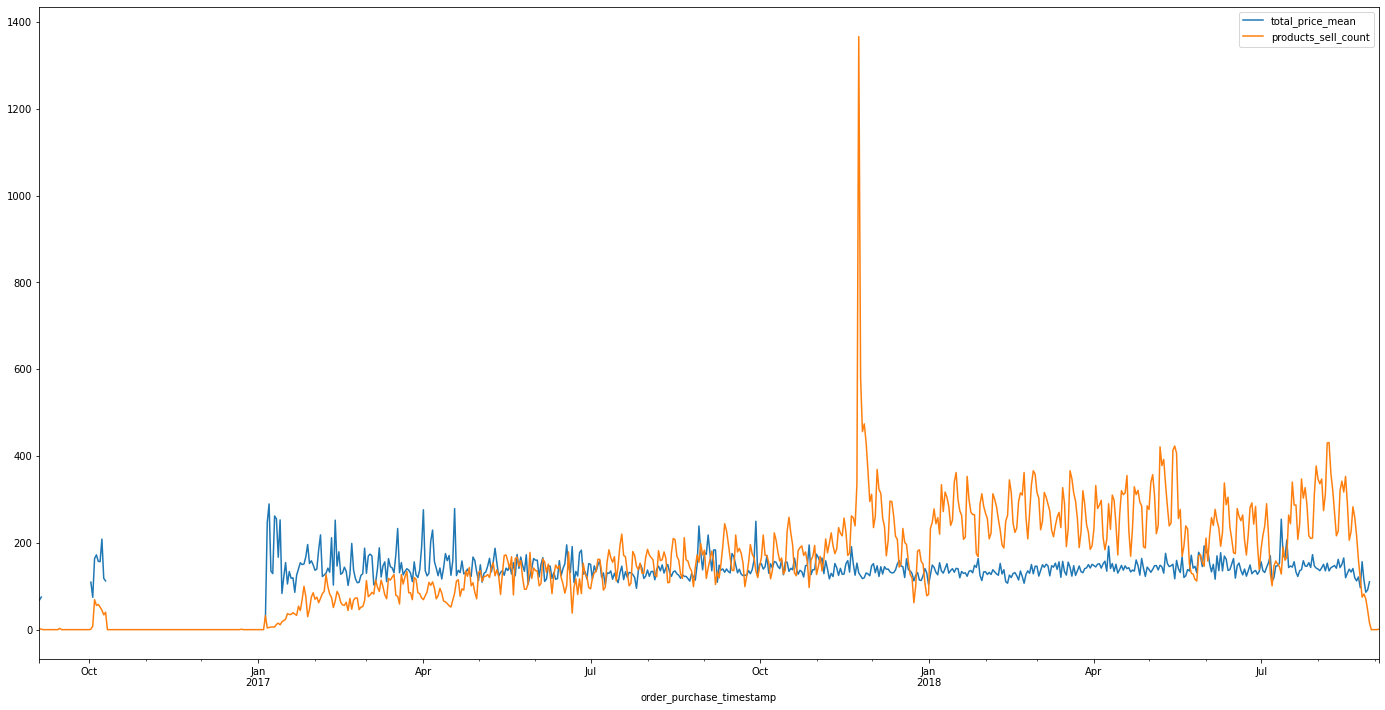

In [8]:
products_purchases[['total_price_mean','products_sell_count']].plot()

In [9]:
dt_orders['order_purchase_timestamp'] = pd.to_datetime(dt_orders['order_purchase_timestamp'])
orders = dt_orders.set_index(['order_purchase_timestamp'] )
groupby = orders['order_status'].groupby(pd.Grouper(freq='D')) 
orders = groupby.agg('count')
#orders.columns = ['_'.join(column) for column in orders.columns]
orders

order_purchase_timestamp
2016-09-04    1
2016-09-05    1
2016-09-06    0
2016-09-07    0
2016-09-08    0
             ..
2018-10-13    0
2018-10-14    0
2018-10-15    0
2018-10-16    1
2018-10-17    1
Freq: D, Name: order_status, Length: 774, dtype: int64

In [10]:
products_purchases['order_count'] = orders

### Trimming series

In [11]:
products_purchases = products_purchases[['products_sell_count','order_count']]

In [12]:
products_purchases['order_count_MA_7'] = products_purchases['order_count'].rolling(window=7).mean()
products_purchases['order_count_MA_15'] = products_purchases['order_count'].rolling(window=15).mean()

In [13]:
products_purchases['products_sell_count_MA_7'] = products_purchases['products_sell_count'].rolling(window=7).mean()
products_purchases['products_sell_count_MA_15'] = products_purchases['products_sell_count'].rolling(window=15).mean()

In [14]:
mask = (products_purchases.index > '2017-01-05') & (products_purchases.index <= '2018')
products_purchases = products_purchases.loc[mask]

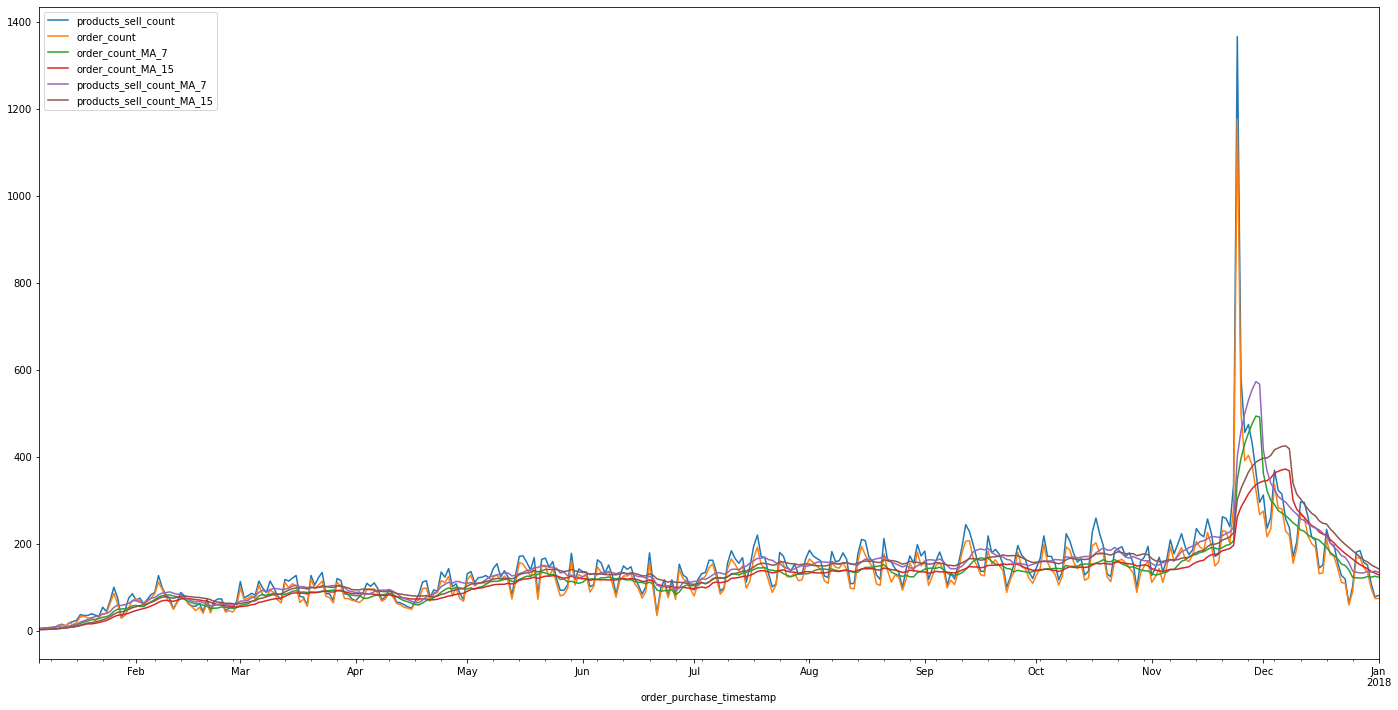

In [15]:
products_purchases.plot()#'total_price_mean',

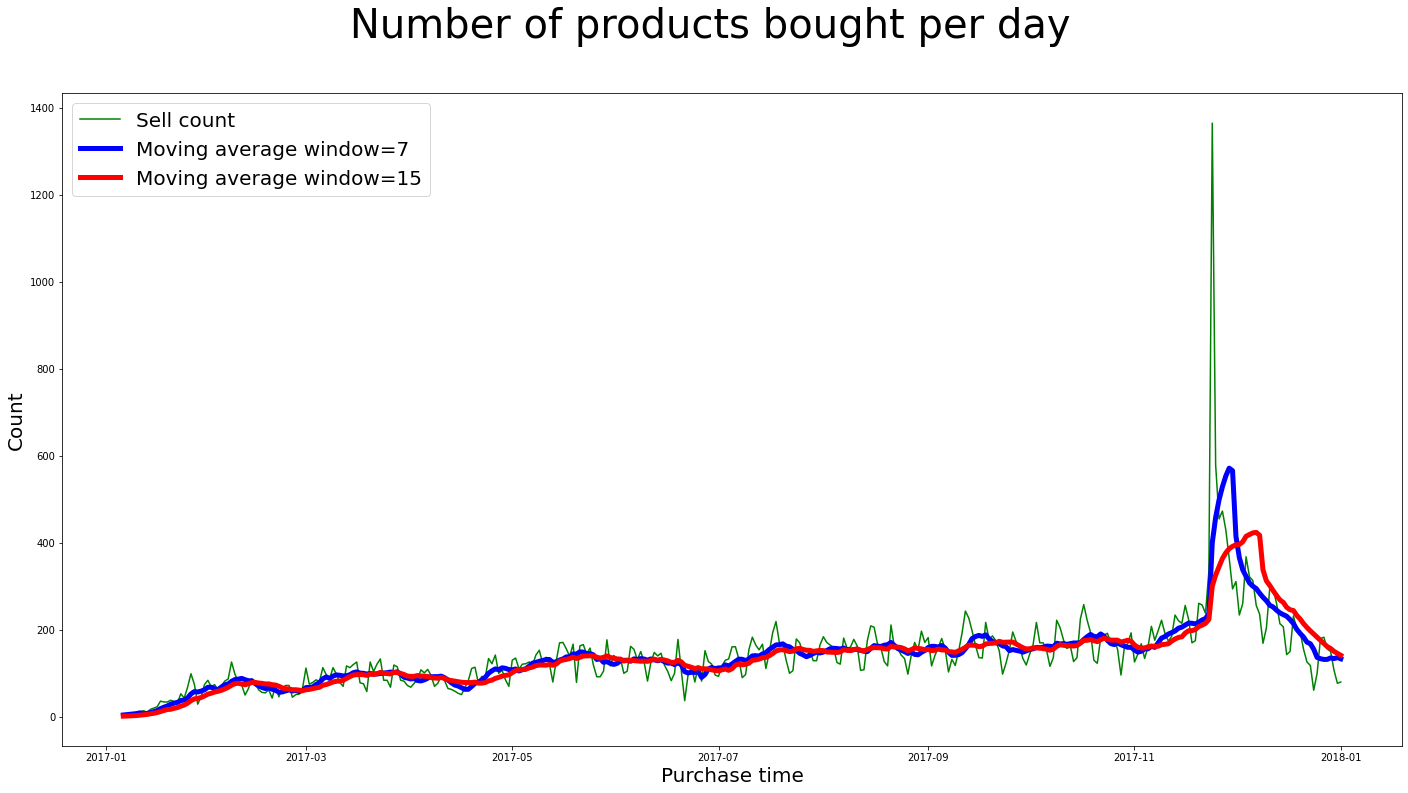

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(products_purchases['products_sell_count'], 'products_sell_count_MA_7', 'products_sell_count_MA_15']])
ax.plot(products_purchases['products_sell_count'], c='g', label='Sell count')
ax.plot(products_purchases['products_sell_count_MA_7'], c='b', label='Moving average window=7',linewidth=5.0)
ax.plot(products_purchases['products_sell_count_MA_15'], c='r', label='Moving average window=15',linewidth=5.0)
fig.suptitle('Number of products bought per day', fontsize=40)
plt.xlabel('Purchase time', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(fontsize=20)#['Sell count', 'Moving average window=7', 'Moving average window=15']
#plt.fontsize(20)
plt.show()

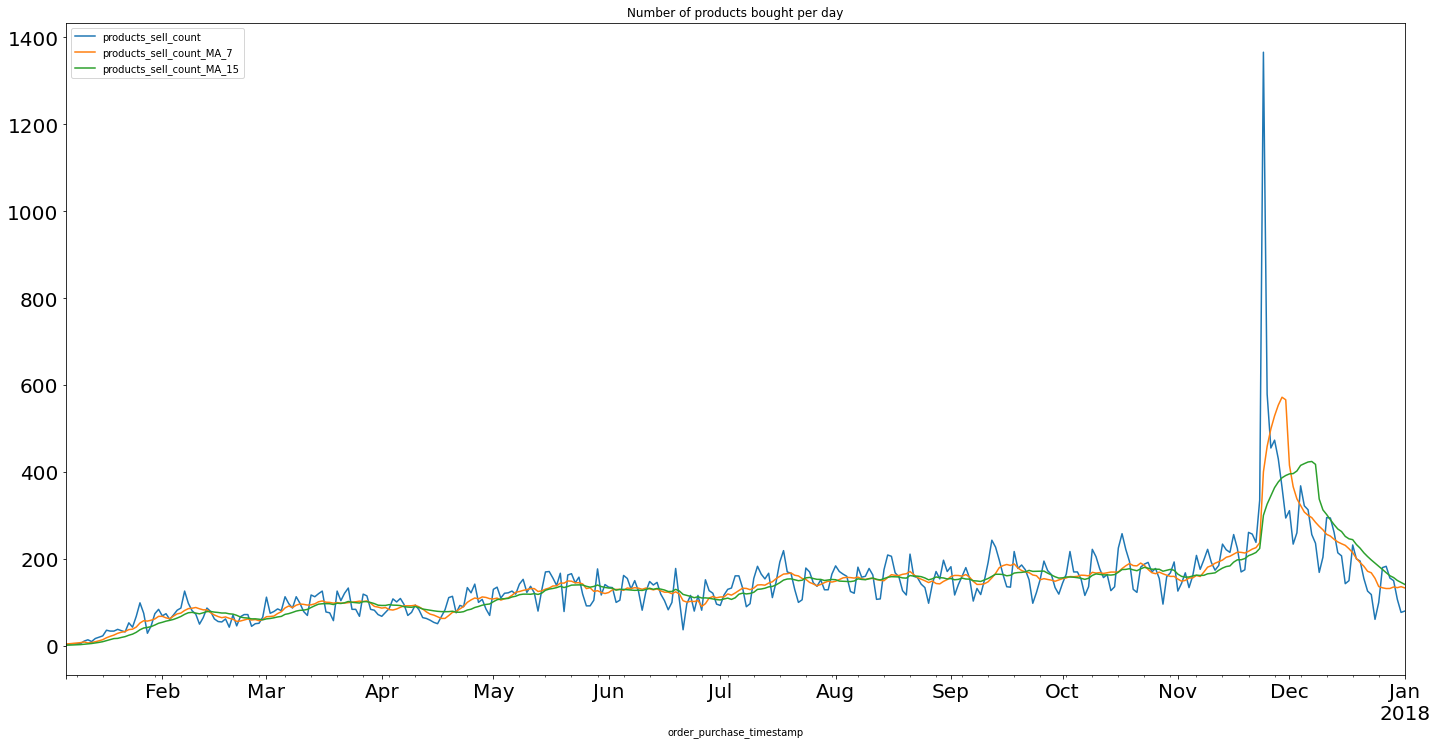

In [17]:
products_purchases[['products_sell_count', 'products_sell_count_MA_7', 'products_sell_count_MA_15']].plot(title='Number of products bought per day', fontsize=20)

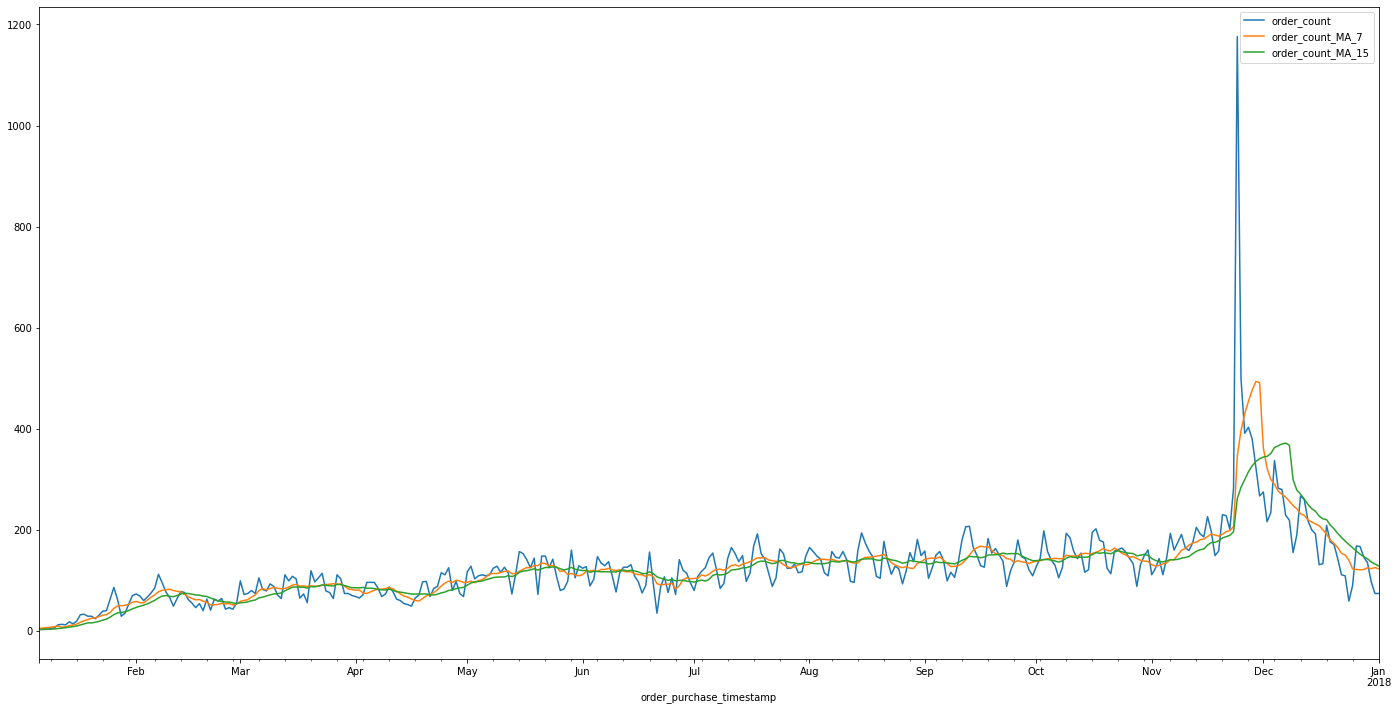

In [18]:
products_purchases[['order_count', 'order_count_MA_7', 'order_count_MA_15']].plot()

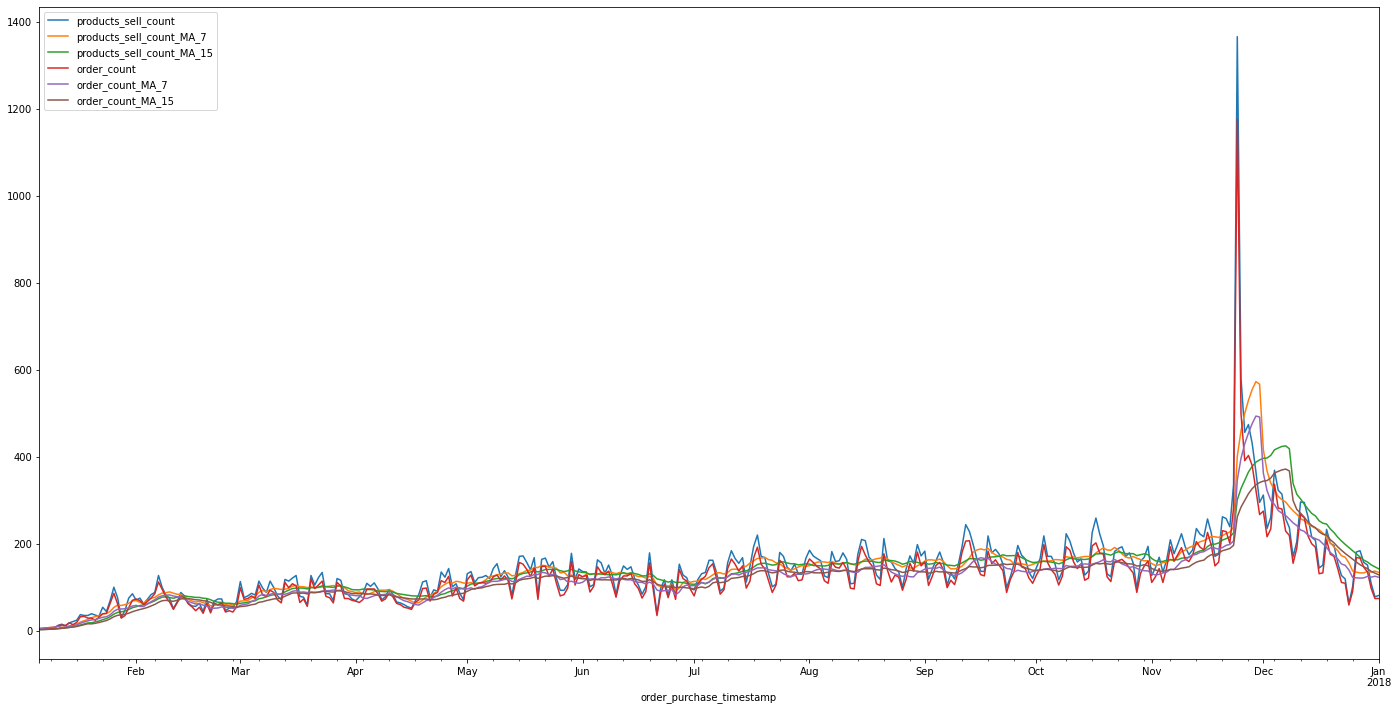

In [19]:
products_purchases[['products_sell_count', 'products_sell_count_MA_7', 'products_sell_count_MA_15', 'order_count', 'order_count_MA_7', 'order_count_MA_15']].plot()

In [20]:
tf._major_api_version

2

In [21]:
products_purchases

,products_sell_count,order_count,order_count_MA_7,order_count_MA_15,products_sell_count_MA_7,products_sell_count_MA_15
order_purchase_timestamp,,,,,,
2017-01-06,4,4,5.142857,2.466667,5.142857,2.466667
2017-01-07,5,4,5.714286,2.666667,5.857143,2.733333
2017-01-08,6,6,6.571429,3.066667,6.714286,3.133333
2017-01-09,6,5,7.285714,3.400000,7.571429,3.533333
2017-01-10,6,6,8.142857,3.800000,8.428571,3.933333
...,...,...,...,...,...,...
2017-12-28,157,146,121.428571,147.000000,133.000000,162.333333
2017-12-29,151,135,124.857143,142.666667,136.428571,158.066667
2017-12-30,108,97,123.142857,136.333333,134.857143,151.400000


# Prediction

In [22]:
features = products_purchases[['products_sell_count', 'products_sell_count_MA_7', 'products_sell_count_MA_15']]

In [23]:
mask = (features.index > '2017-01-05') & (features.index <= '2017-11')
features = features.loc[mask]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6aaf67b80>,
      dtype=object)

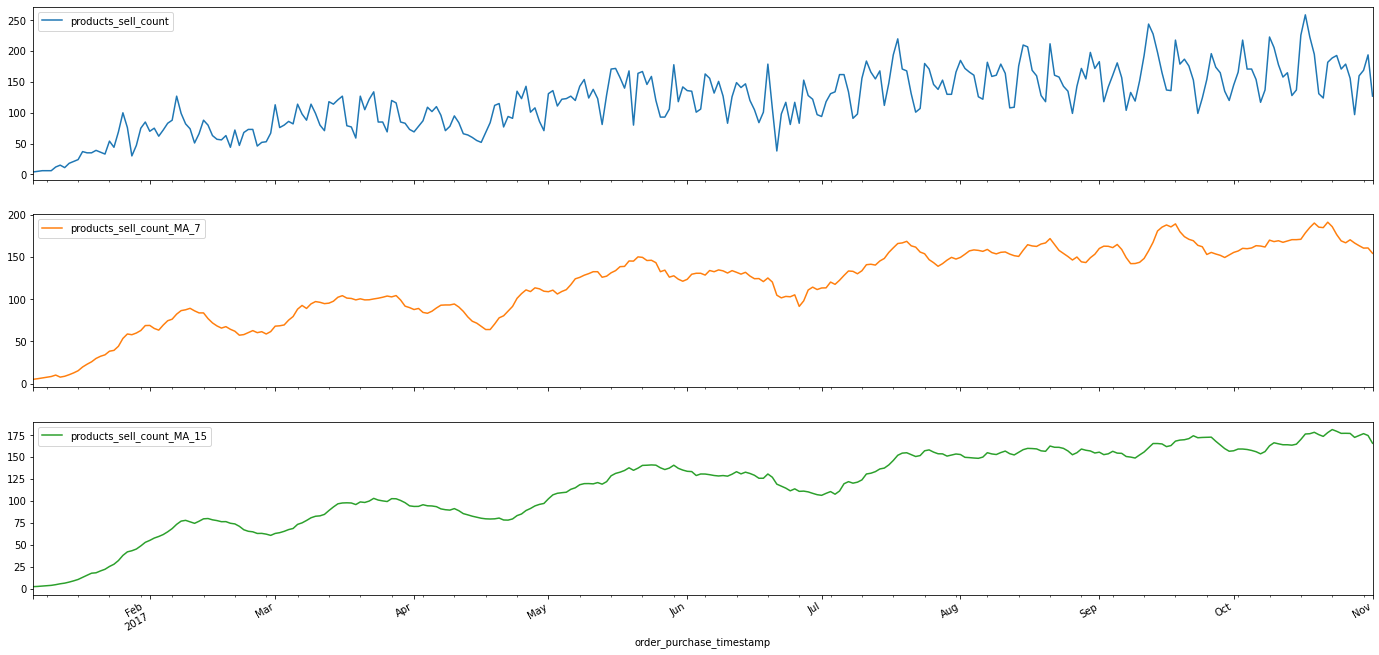

In [24]:
features.plot(subplots=True)

In [25]:
TRAIN_SPLIT = 250
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)


In [26]:
dataset = (dataset-data_mean)/data_std

In [27]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)


In [28]:
TARGET_COLUMN_INDEX = 2
future_target = 1
past_history = 10
STEP = 1
BATCH_SIZE = 1
BUFFER_SIZE = 1
EVALUATION_INTERVAL = 5
EPOCHS = 250


x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, TARGET_COLUMN_INDEX], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)

In [29]:
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, TARGET_COLUMN_INDEX],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

In [30]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target temperature to predict : {}'.format(y_train_multi[0].shape))


Single window of past history : (10, 3)

 Target temperature to predict : (1,)


In [31]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()


In [32]:
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, 1]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()
    
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()


In [33]:
def create_time_steps(length):
  return list(range(-length, 0))


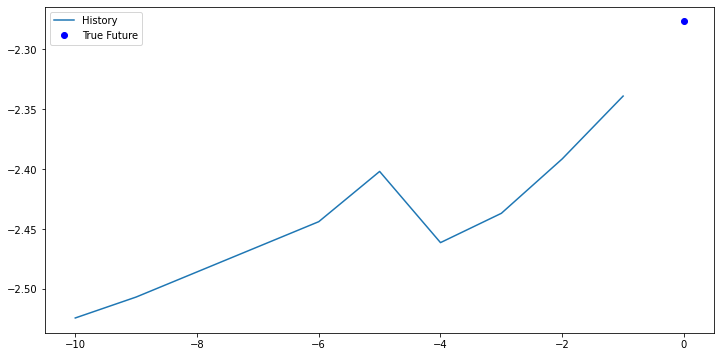

In [34]:
for x, y in train_data_multi.take(1):
  multi_step_plot(x[0], y[0], np.array([0]))


In [35]:
x_train_multi.shape[-2:]

(10, 3)

In [36]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(64,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(64,activation='relu'))#,return_sequences=True
multi_step_model.add(tf.keras.layers.Dense(future_target))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')


In [37]:
for x, y in val_data_multi.take(1):
  print (multi_step_model.predict(x).shape)


(1, 1)


In [38]:
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)


Epoch 1/250
5/5 [==============================] - 0s 92ms/step - loss: 1.3835 - val_loss: 1.4354
Epoch 2/250
5/5 [==============================] - 0s 24ms/step - loss: 0.2624 - val_loss: 1.4380
Epoch 3/250
5/5 [==============================] - 0s 19ms/step - loss: 0.1292 - val_loss: 1.4397
Epoch 4/250
5/5 [==============================] - 0s 19ms/step - loss: 0.1318 - val_loss: 1.4370
Epoch 5/250
5/5 [==============================] - 0s 19ms/step - loss: 0.0823 - val_loss: 1.4397
Epoch 6/250
5/5 [==============================] - 0s 19ms/step - loss: 0.0465 - val_loss: 1.4363
Epoch 7/250
5/5 [==============================] - 0s 21ms/step - loss: 0.0797 - val_loss: 1.4256
Epoch 8/250
5/5 [==============================] - 0s 20ms/step - loss: 0.0829 - val_loss: 1.4214
Epoch 9/250
5/5 [==============================] - 0s 25ms/step - loss: 0.0934 - val_loss: 1.4277
Epoch 10/250
5/5 [==============================] - 0s 21ms/step - loss: 0.0816 - val_loss: 1.4348
Epoch 11/250
5/5 [=

Epoch 84/250
5/5 [==============================] - 0s 22ms/step - loss: 0.1039 - val_loss: 0.1321
Epoch 85/250
5/5 [==============================] - 0s 22ms/step - loss: 0.1110 - val_loss: 0.3251
Epoch 86/250
5/5 [==============================] - 0s 23ms/step - loss: 0.1697 - val_loss: 0.2500
Epoch 87/250
5/5 [==============================] - 0s 22ms/step - loss: 0.1220 - val_loss: 0.1121
Epoch 88/250
5/5 [==============================] - 0s 23ms/step - loss: 0.1013 - val_loss: 0.0815
Epoch 89/250
5/5 [==============================] - 0s 23ms/step - loss: 0.0698 - val_loss: 0.2277
Epoch 90/250
5/5 [==============================] - 0s 22ms/step - loss: 0.1124 - val_loss: 0.1476
Epoch 91/250
5/5 [==============================] - 0s 24ms/step - loss: 0.1014 - val_loss: 0.0740
Epoch 92/250
5/5 [==============================] - 0s 23ms/step - loss: 0.1052 - val_loss: 0.1141
Epoch 93/250
5/5 [==============================] - 0s 23ms/step - loss: 0.0716 - val_loss: 0.2353
Epoch 94/2

5/5 [==============================] - 0s 25ms/step - loss: 0.0785 - val_loss: 0.0915
Epoch 167/250
5/5 [==============================] - 0s 24ms/step - loss: 0.0490 - val_loss: 0.0855
Epoch 168/250
5/5 [==============================] - 0s 26ms/step - loss: 0.0625 - val_loss: 0.2038
Epoch 169/250
5/5 [==============================] - 0s 28ms/step - loss: 0.0963 - val_loss: 0.0835
Epoch 170/250
5/5 [==============================] - 0s 31ms/step - loss: 0.0694 - val_loss: 0.3181
Epoch 171/250
5/5 [==============================] - 0s 31ms/step - loss: 0.0549 - val_loss: 0.2156
Epoch 172/250
5/5 [==============================] - 0s 34ms/step - loss: 0.0529 - val_loss: 0.3754
Epoch 173/250
5/5 [==============================] - 0s 30ms/step - loss: 0.0386 - val_loss: 0.3047
Epoch 174/250
5/5 [==============================] - 0s 29ms/step - loss: 0.0525 - val_loss: 0.1953
Epoch 175/250
5/5 [==============================] - 0s 31ms/step - loss: 0.0385 - val_loss: 0.3666
Epoch 176/250


5/5 [==============================] - 0s 23ms/step - loss: 0.0474 - val_loss: 0.0897
Epoch 249/250
5/5 [==============================] - 0s 25ms/step - loss: 0.0917 - val_loss: 0.0871
Epoch 250/250
5/5 [==============================] - 0s 24ms/step - loss: 0.0658 - val_loss: 0.0963


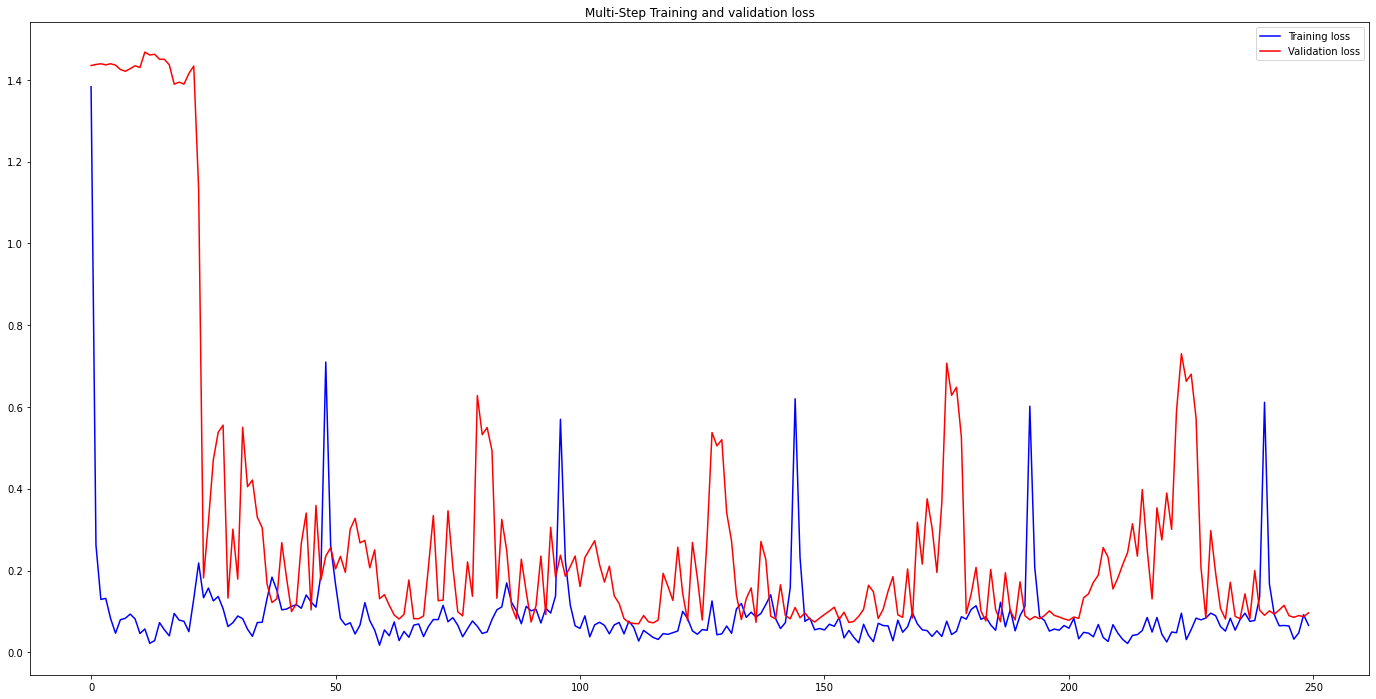

In [39]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')


In [89]:
predictions = []
trues = []
for x, y in val_data_multi.take(50):
    preds = multi_step_model.predict(x)[0]
    predictions.append(preds)
    trues.append(y[0]) 
    #multi_step_plot(x[0], y[0], preds)
  

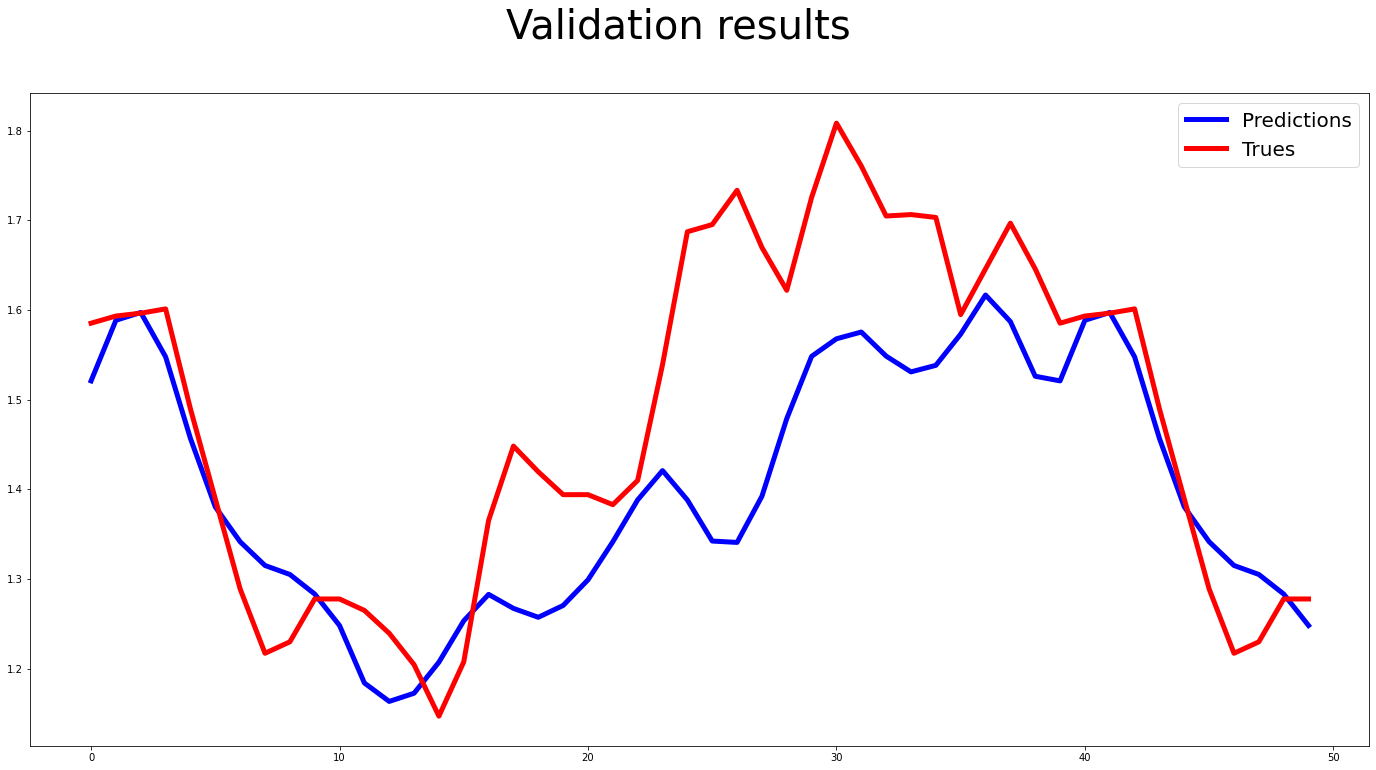

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(predictions, c='b', label='Predictions',linewidth=5.0)
ax.plot(trues, c='r', label='Trues',linewidth=5.0)
fig.suptitle('Validation results', fontsize=40)
#plt.xlabel('Normalizee', fontsize=20)
#plt.ylabel('Count', fontsize=20)
plt.legend(fontsize=20)#['Sell count', 'Moving average window=7', 'Moving average window=15']
#plt.fontsize(20)
plt.show()

## Testing with december

In [62]:
features_test = products_purchases[['products_sell_count', 'products_sell_count_MA_7', 'products_sell_count_MA_15']]
mask = (features_test.index > '2017-11')
features_test = features_test.loc[mask]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe62c144be0>,
      dtype=object)

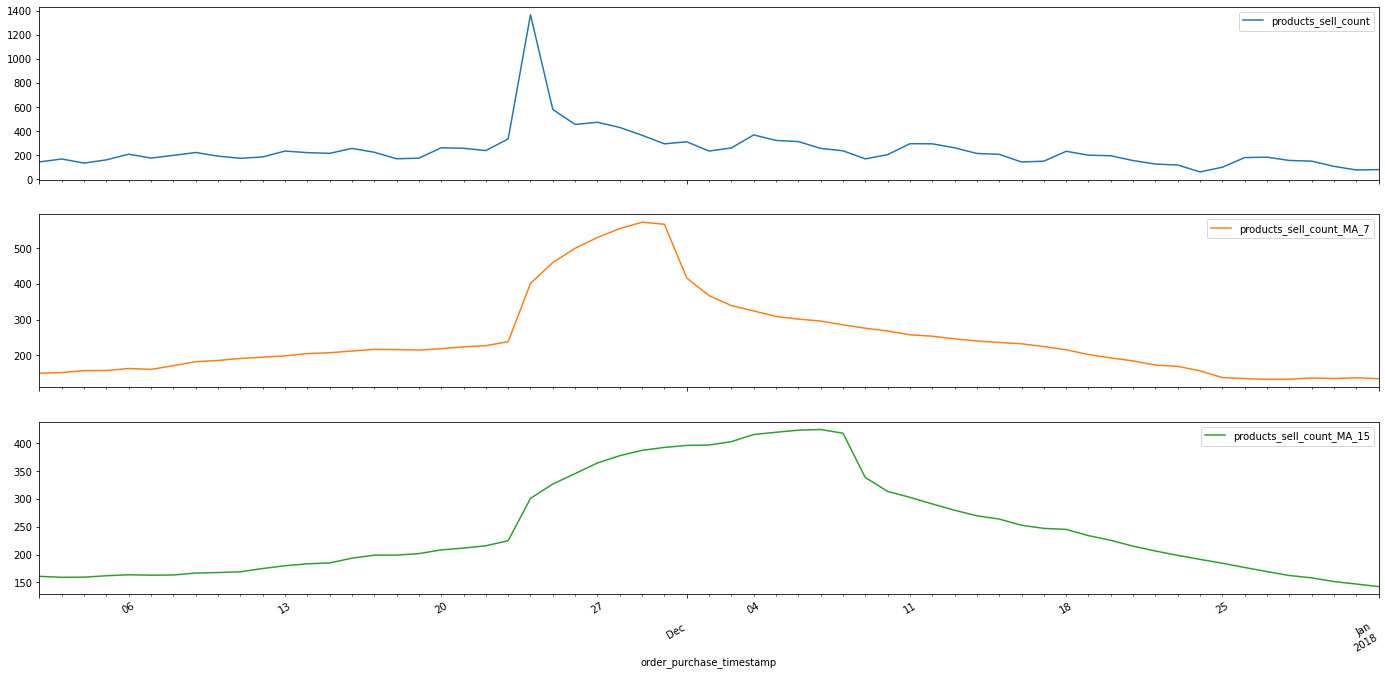

In [63]:
features_test.plot(subplots=True)

In [74]:
dataset_test = (features_test.values-data_mean)/data_std
x_test_multi, y_test_multi = multivariate_data(dataset_test, dataset_test[:, TARGET_COLUMN_INDEX],
                                             0, None, past_history,
                                             future_target, STEP)

In [75]:
test_data_multi = tf.data.Dataset.from_tensor_slices((x_test_multi, y_test_multi))
test_data_multi = test_data_multi.batch(BATCH_SIZE).repeat()

In [84]:
predictions_test = []
trues_test = []
for x, y in test_data_multi.take(50):
    preds = multi_step_model.predict(x)[0]
    predictions_test.append(preds)
    trues_test.append(y[0]) 
    #multi_step_plot(x[0], y[0], preds)

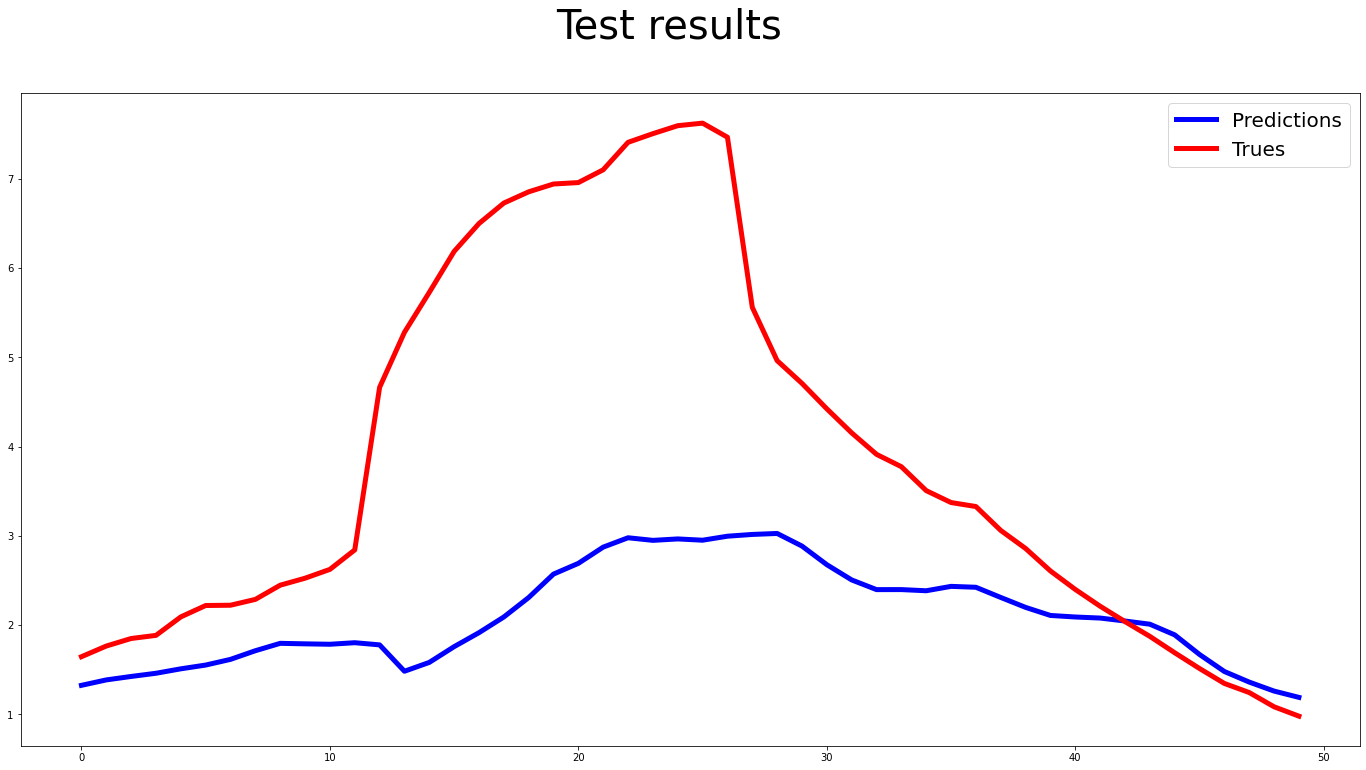

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(predictions_test, c='b', label='Predictions',linewidth=5.0)
ax.plot(trues_test, c='r', label='Trues',linewidth=5.0)
fig.suptitle('Test results', fontsize=40)
#plt.xlabel('Normalizee', fontsize=20)
#plt.ylabel('Count', fontsize=20)
plt.legend(fontsize=20)#['Sell count', 'Moving average window=7', 'Moving average window=15']
#plt.fontsize(20)
plt.show()

## SVM Regression

In [41]:
x_val_multi.shape, y_val_multi.shape

((39, 10, 3), (39, 1))